<a href="https://colab.research.google.com/github/ManshaP/CCEES/blob/master/exercise_2/2_bifurcation_diagram_of_logistic_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2)

In [0]:
# define logistic map

def logistic_map(u, mu):
    return mu * u * (1 - u)

# define generic nth iterate map

def n_iterate_map(n, u, mu):
    current_u = u
    for i in range(n):
        current_u = logistic_map(current_u, mu)
    return current_u

def logistic_iterates(u, mus, n=2):
    sim = {}
    for mu in mus:
        iterates = []
        for i in range(n+1):
            nth_iterate = n_iterate_map(i, u, mu)
            iterates.append(nth_iterate)
        sim[mu] = iterates
    return sim

In [0]:
u0=0.5
mu0=3.5
spin_up=4000
plot_steps=400
def single_mu_it(n, u, mu):
  iterates = []
  for i in range(n+1):
    nth_iterate = n_iterate_map(i, u0, mu)
    iterates.append(nth_iterate)
  return iterates
    

In [0]:
a=single_mu_it(spin_up+plot_steps, u0, mu0 )

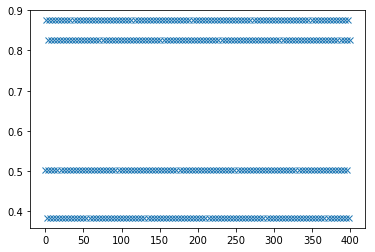

In [10]:
plt.plot(a[spin_up:(spin_up+plot_steps)], marker='x', linestyle='None')

In [0]:

def stepper(u0, mu0, mu1, N_mu):
    bif_data=[]
    for i in range(N_mu):
        current_mu=mu0+(mu1-mu0)*i/N_mu
        bif_data.append(single_mu_it(spin_up+plot_steps, u0, current_mu)[spin_up:(spin_up+plot_steps)])
    return np.array(bif_data)

In [12]:
u0=0.5
mu0=2.8
mu1=4.5
N_mu=1000
bif_data=stepper(u0, mu0, mu1, N_mu)
mu_range=np.repeat(np.linspace(mu0, mu1, N_mu), plot_steps)
plt.scatter(mu_range, bif_data, marker='x')

KeyboardInterrupt: ignored

In [0]:
plt.figure(figsize=(20,10))
plt.scatter(mu_range, bif_data, marker='.', s=0.001)